<a href="https://colab.research.google.com/github/deathstar1/Machine-Learning-Notebooks/blob/main/Time_Series_Data_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Graph

In [8]:
import matplotlib.pyplot as plt
import numpy as np



In [4]:
def plot():
  plt.plot([1, 2, 3], [1, 2, 3], label='line-1')
  plt.plot([1, 2, 3], [3, 2, 1], label='line-2')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.legend(fontsize=12)
  plt.grid(True)

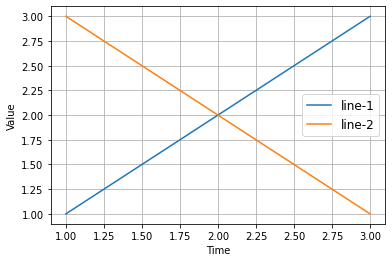

In [ ]:
plot()

In [14]:
def plot_series(time,series, format ='-' ,start=0,end=None,label=None):
  plt.plot(time[start:end] ,series[start:end] , label=label )
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.legend(fontsize=12)

In [15]:
def trend(time, appreciation):
  return time * appreciation


No handles with labels found to put in legend.


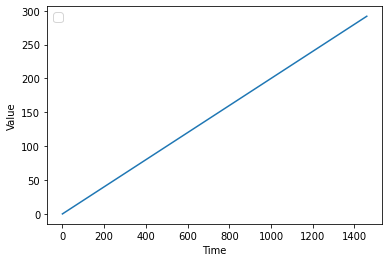

In [17]:
time =np.arange(365*4 )
series = trend(time, 0.2)

plot_series(time,series)
plt.show()

Noise plot

In [24]:
def generate_noise(time, noise_level ,seed =None):
  random = np.random.RandomState(seed)
  return random.randn(len(time)) * time + noise_level

[  10.            9.8617357    11.29537708 ...  565.34776677 1890.45951545
  992.1715915 ]


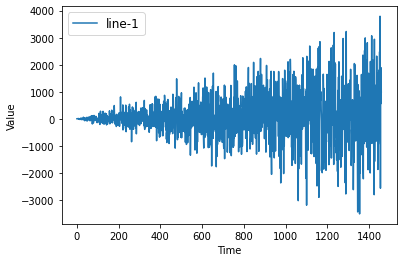

In [25]:
noise = generate_noise(time, 10 , 42)
print (noise)
plt.plot(time, noise, label='line-1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(fontsize=12)

In [28]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    print(time)
    print(phase)
    print(period)
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

No handles with labels found to put in legend.


[   0    1    2 ... 1457 1458 1459]
0
365


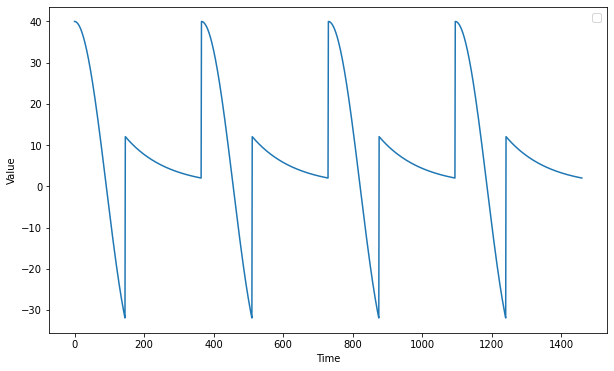

In [29]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


No handles with labels found to put in legend.


[   0    1    2 ... 1457 1458 1459]
0
365


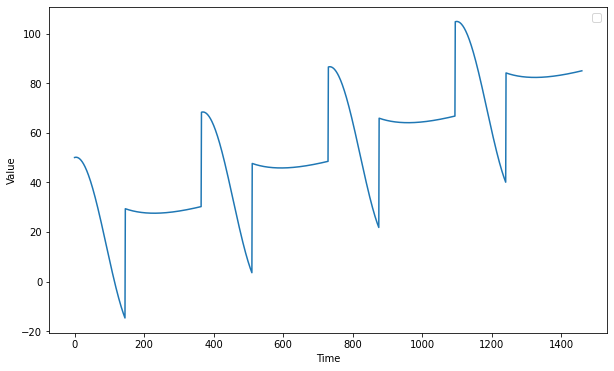

In [30]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

No handles with labels found to put in legend.


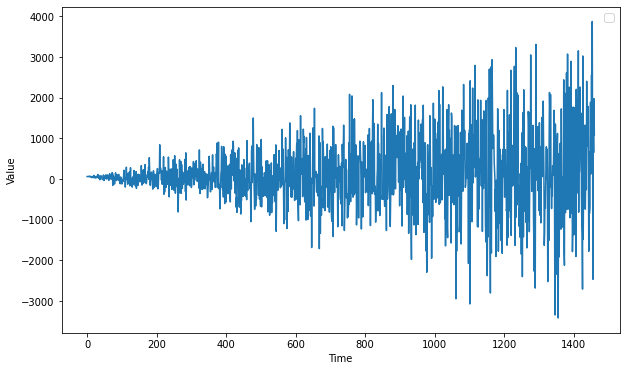

In [31]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [32]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ1 = 0.5
    φ2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += φ1 * ar[step - 50]
        ar[step] += φ2 * ar[step - 33]
    return ar[50:] * amplitude

No handles with labels found to put in legend.


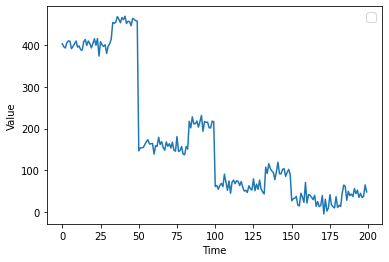

In [33]:
series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

No handles with labels found to put in legend.


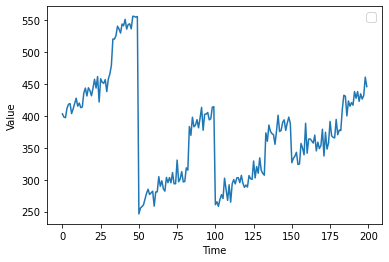

In [34]:
series = autocorrelation(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

In [36]:
def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
              ar[step] += φ * ar[step - lag]
    return ar

No handles with labels found to put in legend.


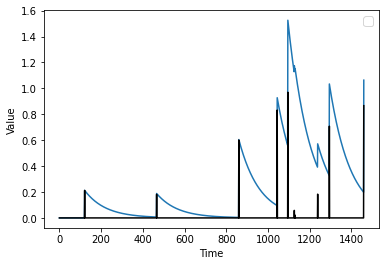

In [38]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series  
    
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

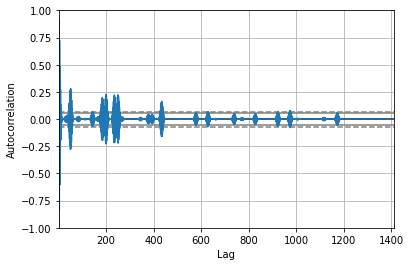

In [39]:
from pandas.plotting import autocorrelation_plot

series_diff = series
for lag in range(50):
  series_diff = series_diff[1:] - series_diff[:-1]

autocorrelation_plot(series_diff)

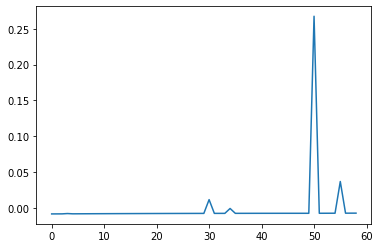

In [41]:
import pandas as pd

series_diff1 = pd.Series(series[1:] - series[:-1])
autocorrs = [series_diff1.autocorr(lag) for lag in range(1, 60)]
plt.plot(autocorrs)
plt.show()

In [42]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1459
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2360.556
Method:                       css-mle   S.D. of innovations              0.048
Date:                Fri, 15 Jan 2021   AIC                          -4707.112
Time:                        15:19:54   BIC                          -4670.114
Sample:                             1   HQIC                         -4693.310
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.585      0.558      -0.002       0.003
ar.L1.D.y     -0.0101      0.030     -0.340      0.734      -0.068       0.048
ar.L2.D.y     -0.0100      0.030     -0.339      0.7